## https://github.com/deepinsight/insightface/tree/master/alignment/coordinate_reg

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from insightface.app import FaceAnalysis
from pathlib import Path
from scipy.spatial import ConvexHull
from tqdm import tqdm

In [35]:
#IMG_PATH = Path('/home/phdomingues/masters/data/datasets/Occlusion/images/f3.jpg')
#MASK_PATH = Path('/home/phdomingues/masters/results/Occlusion/sam/f3.png')

IMG_PATH = Path('/home/phdomingues/masters/data/UNIFESP/all/05_110222.bmp')
MASK_PATH = Path('/home/phdomingues/masters/results/UNIFESP360/sam/05_110222.png')
# Imagens que detecta a face com a segmentação = f3 / f8

In [36]:
# Carrega o RetinaFace
det_sizes = [(320,320), (640,640), (800,800)]
app = FaceAnalysis(providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])#, allowed_modules=['landmark_2d_106'])
app.prepare(ctx_id=0, det_size=det_sizes[1])

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/phdomingues/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3,

In [37]:
# Input data
img = cv2.imread(str(IMG_PATH))
mask = cv2.imread(str(MASK_PATH),0)
img_masked = cv2.bitwise_and(img, img, mask=mask)


# Output data
out_img = img.copy()
out_img_masked = img_masked.copy()

# Process keypoints
faces = app.get(img)
faces_masked = app.get(img_masked)

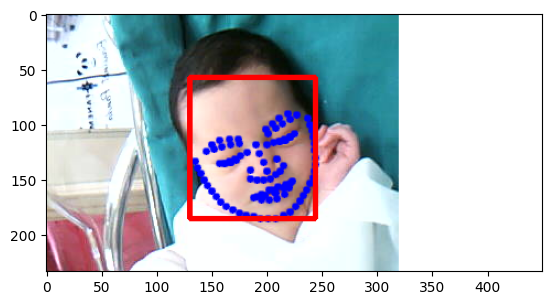

In [38]:
for face in faces:
    lmk = face.landmark_2d_106
    lmk = np.round(lmk).astype(int)
    for i in range(lmk.shape[0]):
        p = tuple(lmk[i])
        cv2.circle(out_img, p, 1, (255,0,0), 3, cv2.LINE_AA)
    cv2.rectangle(out_img, face.bbox[:2].astype(int), face.bbox[2:].astype(int), (0,0,255), 3)
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
plt.show()

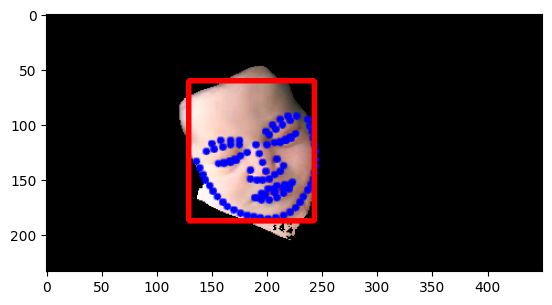

In [39]:
for face in faces_masked:
    lmk = face.landmark_2d_106
    lmk = np.round(lmk).astype(int)
    for i in range(lmk.shape[0]):
        p = tuple(lmk[i])
        cv2.circle(out_img_masked, p, 1, (255,0,0), 3, cv2.LINE_AA)
    cv2.rectangle(out_img_masked, tuple(face.bbox[:2].astype(int)), tuple(face.bbox[2:].astype(int)), (0,0,255), 3)
plt.imshow(cv2.cvtColor(out_img_masked, cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
print(faces_masked[0].bbox[:2])
print(faces_masked[0].bbox[2:])
print(img_masked.shape)


tuple(faces_masked[0].bbox[:2].astype(int))


[129.54185  60.54907]
[243.01988 187.21074]
(233, 450, 3)


(129, 60)